# Model overfitting, validation, process models

At this point, we have had our first experience with analysing a data set with a machine learning method (e.g. kNN)
and evaluating the results.
In this module, we will discuss the problem of model overfitting and how to validate the model.
We will also introduce some the CRISP-DM process model, as well as other process models, which create much-needed structure to the data analysis process.

## Model overfitting

Whenever we apply a machine learning method to a data set, the goal is to construct a trained model that generalizes well to new, unseen data. For example, decision trees and trained neural networks are models that can be used to predict the class of a new data point. The kNN algorithm that we previously studied is conceptually slightly different: there the model is the training data itself, and the prediction is made by comparing the new data point to the training data.

Irrespective of the method, the predictions rely on the training data, or, expressed differently, on a model that grasps the essence of the training data.


The problem of model overfitting stems from the fact that a constructed model, as it grasps the characteristics of the training data, always adapts to the specific peculiarities of the training data. These peculiarities can be noise in the data, or they can be patterns that are not generalizable to new data.

Consider an extreme example where we collect a group of people (say 30 persons), and try to predict who of them will be left-handed. As explanatory variables, we might use a large number of easily measurable quantities, such as height, weight, age, etc. We might also include some more exotic variables, such as the number of freckles on the person's face. If we have enough variables, we can construct a model that predicts the left-handedness of the person with 100% accuracy. The model might tell that, for example, if you are 1.75 meters tall, weigh 70 kg, and have 10 freckles on your face, you are left-handed. This model is overfitted, as it is based on the peculiarities of the training data, and not on generalizable patterns.

Even though this example is extreme, the danger of model overfitting is real in all machine learning applications. The goal of the data analyst is to construct a model that generalizes well to new data, and does not overfit to the training data.

In our extreme example, we can easily test whether the model generalizes well to new data by collecting a new group of people and testing the model on them. Almost inevitably, the model will fail to predict the left-handedness of the new group of people, as the model is based on the peculiarities of the training data. The accuracy of the classifier in this new data would probably be comparable to random guessing.

The act of collecting new data to test the model is called validation. In the following sections, we will discuss different ways to validate a model.

## Validation

Validation means exposing the model to new data to test its generalization capabilities. The measures of goodness for a classifier, such as accuracy, precision, and recall should always be estimated from data that has not been used to train the model. That way, we can be sure that the model generalizes well to new data, or, in other words, is not subject to overfitting.

There are various ways to validate a model. In the following sections, we will discuss some of the most common ones.

### Split validation

Split validation means that a part of the data is used to train the model, and another part is used to test the model. The simplest way to do this is to split the data into two parts: a training set and a test set. The training set is used to train the model, and the test set is used to evaluate the model. In most cases, the split is done randomly.

It is a common practice to use roughty two-thirds of the data for training and one-third for testing. The exact ratio depends on the size of the data set and the problem at hand.

Let us use the Iris data set to illustrate split validation, in conjunction with the kNN classifier. The following code snippet demonstrates how to split the data into training and test sets, and how to train and evaluate the kNN classifier.


In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris = pd.read_csv('datasets/iris/iris.csv')

X = iris.drop(columns = 'species')
y = iris['species']

# Split the dataset into a training set and a testing set
# 70% of the data will be used for training, 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Create a kNN classifier
# n_neighbors parameter specifies the number of neighbors to use (k)
knn = KNeighborsClassifier(n_neighbors=3)

# Train the kNN classifier on the training data
knn.fit(X_train, y_train)

# Use the trained classifier to predict labels for the test set
y_pred = knn.predict(X_test)

# Calculate and print the accuracy of the classifier on the test set
accuracy_test = accuracy_score(y_test, y_pred)
print(f"Accuracy of kNN classifier on the test set: {accuracy_test:.2f}")

Accuracy of kNN classifier on the test set: 0.96


For comparison, the following code block calculates the accuracy of the kNN classifier on the training set. In many cases, the accuracy on the training set is higher than the accuracy on the test set, as the model is trained on the training data, and therefore performs better on the training data than on new, unseen data. Do not rely on the training accuracy as a measure of the model's performance!

In [46]:
# This is just to show the difference between training and test accuracy
y_train_pred = knn.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f"Accuracy of kNN classifier on the training set: {accuracy_train:.2f} (EXERCISE CAUTION!)")

Accuracy of kNN classifier on the training set: 0.98 (EXERCISE CAUTION!)


> As you run the code, you may occasionally get different accuracy values, as the data is split randomly into training and test sets. As the Iris data set is relatively small and easy for the kNN classifier, the accuracy is expected to be high even for the test set, and randomness in the data split may cause the accuracy to vary.
>
> Generally, the model overfitting becomes worse as the number of features, and, consequently, model complexity increases. In the Iris data set, we have only four features, which makes the problem relatively simple. In more complex problems, the risk of overfitting is higher.
>
In the sklearn library, the `train_test_split` function is used to split the data into training and test sets. The `test_size` parameter specifies the proportion of the data that should be used for testing. The rows of the data frame are split randomly, so each run of the code may give slightly different results (unless the random seed is fixed). The optional `random_state` parameter can be used to fix the random seed, which ensures that the data is split in the same way each time the code is run. This can be useful for reproducibility. As the parameter value, just choose an integer, e.g. 123. Never tune the value to get favorable results, as this would be a form of malpractice called cherry picking.

Split validation is often the preferred validation method whn the data set is large enough. It is simple to implement and understand, and it gives a good estimate of the model's performance. However, it has some drawbacks. The most important drawback is that the model is trained on only a part of the data, which means sacrificing a part of the data set eligible for training. The more data is used for training, the better the model can learn the patterns in the data. In the next section, we will discuss a validation method that uses all the data for training.

### Cross-validation

When the data set is small, split validation may not be the best choice, as the model may not be able to learn the patterns in the data well, and the exact shape of the model may depend on the random split of the data.

In such cases, cross-validation is a better choice. Cross-validation is a validation method that uses all the data for training and testing, but in a smart way.

Cross-validation process starts by dividing the training data into k equally sized parts, called folds. The model is trained k times, each time using k-1 folds for training and one fold for testing. The performance of the model is then averaged over the k runs.

Consider an example where the data set contains 200 samples, and we use 10-fold cross-validation. The data is divided into 10 folds, each containing 20 samples. 

The following image illustrates the division of the original training into 10 folds:

Here is the resulting image:

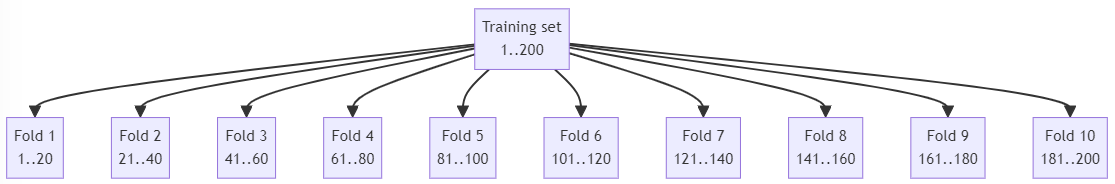

In [47]:
from IPython.display import Image, display;display(Image(filename="img/folds.png"))



After creating the folds, the model is trained 10 times, each time using 9 folds for training and one fold for testing. In the first run, folds 2 to 10 are used for training, and fold 1 is used for testing. In the second run, folds 1, and 3 to 10 are used for training, and fold 2 is used for testing, and so on.

During each run, the training set contains 180 samples and the test set contains 20 samples. The performance of the model is evaluated on the test set, and the results are averaged over the 10 runs.

As a consequence, each observation in the data set is used for testing exactly once, and the model is trained on all the data. This makes cross-validation a good choice when the data set is small. It eliminates the randomness in the data split inherent in split validation, and it uses all the data for training.

When cross-validation is applied in `sklearn`, the data set is not split into separate training and test sets. Instead, the `cross_val_score` function is used to perform the cross-validation. The function takes the model, the data, and the number of folds as input, and returns the performance of the model in each fold. The performance is then averaged over the folds.

The following code snippet demonstrates how to use cross-validation with the kNN classifier and the Iris data set:


In [48]:
from sklearn.neighbors import KNeighborsClassifier

iris = pd.read_csv('datasets/iris/iris.csv')

X = iris.drop(columns = 'species')
y = iris['species']

# Create a kNN classifier
# n_neighbors parameter specifies the number of neighbors to use (k)
knn = KNeighborsClassifier(n_neighbors=3)

# Perform 10-fold cross-validation
# The cv parameter specifies the number of folds
# The scoring parameter specifies the performance measure to use
# In this case, accuracy is used

from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')

# Calculate and print the average accuracy over the folds
average_accuracy = scores.mean()
print(f"Average accuracy of kNN classifier using 10-fold cross-validation: {average_accuracy:.2f}")


Average accuracy of kNN classifier using 10-fold cross-validation: 0.97


The number of folds used (10) is a conventional choice and the value probably most often seen in practice. The value can be adjusted according to the size of the data set. In general, the more folds are used, the more reliable the estimate of the model's performance is, but the longer the computation time is.

As an extreme case of cross-validation, the parameter `cv` can be set to the number of samples in the data set, which is called leave-one-out cross-validation. In leave-one-out cross-validation, the model is trained and tested on all samples except one, and the performance is averaged over all samples. Leave-one-out cross-validation is computationally expensive, but it gives the most reliable estimate of the model's performance.

As is the case with the split validation, the results of cross-validation should never be 'optimized' by tuning the number of folds, as this would, again, be a form of cherry picking.


## Process models

Carrying out machine learning projects involves a lot of experimentation and decision-making. The data analyst must decide which method to use, how to preprocess the data, how to validate the model, and how to evaluate the results. The process can be complex and time-consuming, with many sidesteps and dead-ends, and it is easy to get lost in the details.

If the process is not structured, this can lead into a lot of hassle and wasted time. Same experiments may be run over and over again with different parameter settings, and it is easy to loose track of what has been done and what is still to do. Furthemore, as one dwells in the details, it is easy to forget the big picture and the ultimate goal of the analysis.

To overcome the challenges of data analysis, several process models have been developed. These models provide a structured way to carry out data analysis projects, and they help to keep the focus on the big picture. In this section, we will introduce some of the most common process models.

### CRISP-DM

CRISP-DM is one of the most widely used process models in data mining and machine learning. It stands for Cross-Industry Standard Process for Data Mining, and it provides a structured way to carry out data analysis projects. Also, this is the process model that we will use in this course.

The model contains six phases, which are described below:

1. Business understanding: The first phase is to understand the business problem that needs to be solved. What is the goal of the analysis? What are the requirements and constraints? What is the expected outcome?
2. Data understanding: The second phase is to collect and explore the data. What data is available? What are the characteristics of the data (variable types, value distributions etc.)? Are there any quality issues with the data (missing values, outliers, nonsensical values)?
3. Data preparation: The third phase is to preprocess the data. This includes cleaning the data, transforming the data, and selecting the relevant features. These steps should be documented in such detail that they can be reproduced later.
4. Modeling: The fourth phase is to choose a machine learning method and train the model. This phase also includes the validation of the model. Documentation needs include: which method was used, which parameters were used, what was the performance of the model?
5. Evaluation: The fifth phase is to evaluate the model. How well does the model perform? Does it meet the business requirements?
6. Deployment: The final phase is to deploy the model. How will the model be used in practice? How will the results be communicated? This phase may involve creating a recommendation of how to use the model in practice, or what to do next.

Further reading:
 - [Data Science Process Alliance: What is CRISP DM?](https://www.datascience-pm.com/crisp-dm-2/)
 - [Wikipedia: CRISP-DM](https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining)
 
From now on, all exercises on this course should follow the CRISP-DM process model. As we use JuPyter notebooks, it is easy to document the process in the notebook itself. Each phase of the process can be a separate section in the notebook, and the results of each phase can also be documented in the same notebook. This is one of the very advantageous features of JuPyter notebooks, as the process is documented in a single file, together with the code, and it is easy to share the results with others and reproduce the analysis.


### Other process models

There are several other process models that can be used in data analysis projects. Some of the most common ones are:

- OSEMN, which stands for Obtain, Scrub, Explore, Model, and iNterpret. This process model is similar to CRISP-DM, but it is more focused on the data preparation and exploration phases. The model is iterative, and the data analyst may go back and forth between the phases.
- KDD, which stands for Knowledge Discovery in Databases. This process model is similar to CRISP-DM, but it is more focused on the knowledge discovery aspect of data analysis. The model is iterative, and the data analyst may go back and forth between the phases.
- SEMMA, which stands for Sample, Explore, Modify, Model, and Assess. This process model, originally introduced by SAS Institute, is similar to CRISP-DM, but it is more focused on the data preparation and modeling phases. The model is iterative, and the data analyst may go back and forth between the phases.

As you can see, the process models are similar in many ways, but they have some differences in emphasis and focus. The most important thing is to use a process model rather than work in an ad-hoc manner. The choice of the model depends on the project at hand, as well as practices and requirements of the organization. On this course, we will use the CRISP-DM process model, as it is widely used and provides a good structure for data analysis projects.